In [1]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np 

In [2]:
aggregatedBinomOnGenes = pd.read_csv("../../../results/tables/aggregated_binomial_on_genes.csv", index_col=0)
aggregatedBinomOnGenes["chrom_couple"] = aggregatedBinomOnGenes.apply(lambda row: row["couple"].split('-')[0][2:4] + "-" + row["couple"].split('-')[1][2:4], axis=1)
aggregatedBinomOnGenes["ratio_two_fold"] = aggregatedBinomOnGenes["number_upregulated_genes_two_fold"] / aggregatedBinomOnGenes["number_of_two_fold_genes"]
aggregatedBinomOnGenes["ratio_horserace"] = aggregatedBinomOnGenes["number_upregulated_genes_horserace"] / aggregatedBinomOnGenes["number_of_horserace_genes"]
aggregatedBinomOnGenes = aggregatedBinomOnGenes.groupby('chrom_couple').filter(lambda x: x.shape[0] >= 400)
aggregatedBinomOnGenes

number_upregulated_genes_two_fold  number_of_two_fold_genes  \
201                                  122                       122   
202                                    0                         9   
203                                  116                       116   
204                                   56                        62   
205                                   18                        30   
...                                  ...                       ...   
16008                                111                       113   
16009                                 33                        33   
16010                                 60                        64   
16011                                122                       122   
16012                                  0                         3   

       pval_two_fold_rule  number_upregulated_genes_horserace  \
201          3.761582e-37                                 122   
202          3.906250e-03                                  23   
203          2.407412e-35                                 122   
204          2.972585e-11                                  86   
205          3.615946e-01                                  58   
...                   ...                                 ...   
16008        1.240684e-30                                 113   
16009        2.328306e-10                                 110   
16010        7.363045e-14                                 107   
16011        3.761582e-37                                 122   
16012        2.500000e-01                                  15   

       number_of_horserace_genes  pval_horse_race                     couple  \
201                          122     3.761582e-37  MD01G1048600-MD07G1125900   
202                          122     1.990499e-12  MD01G1049100-MD07G1126000   
203                          122     3.761582e-37  MD01G1049200-MD07G1126100   
204                          118     6.904732e-07  MD01G1049300-MD07G1126300   
205                          122     6.509598e-01  MD01G1049700-MD07G1126700   
...                          ...              ...                        ...   
16008                        122     4.976850e-24  MD13G1273700-MD16G1261400   
16009                        122     5.467316e-21  MD13G1274100-MD16G1261200   
16010                        122     2.684429e-18  MD13G1274600-MD16G1260200   
16011                        122     3.761582e-37  MD13G1274800-MD16G1260400   
16012                        122     2.684429e-18  MD13G1275200-MD16G1260700   

      chrom_couple  ratio_two_fold  ratio_horserace  
201          01-07        1.000000         1.000000  
202          01-07        0.000000         0.188525  
203          01-07        1.000000         1.000000  
204          01-07        0.903226         0.728814  
205          01-07        0.600000         0.475410  
...            ...             ...              ...  
16008        13-16        0.982301         0.926230  
16009        13-16        1.000000         0.901639  
16010        13-16        0.937500         0.877049  
16011        13-16        1.000000         1.000000  
16012        13-16        0.000000         0.122951  

[10186 rows x 10 columns]

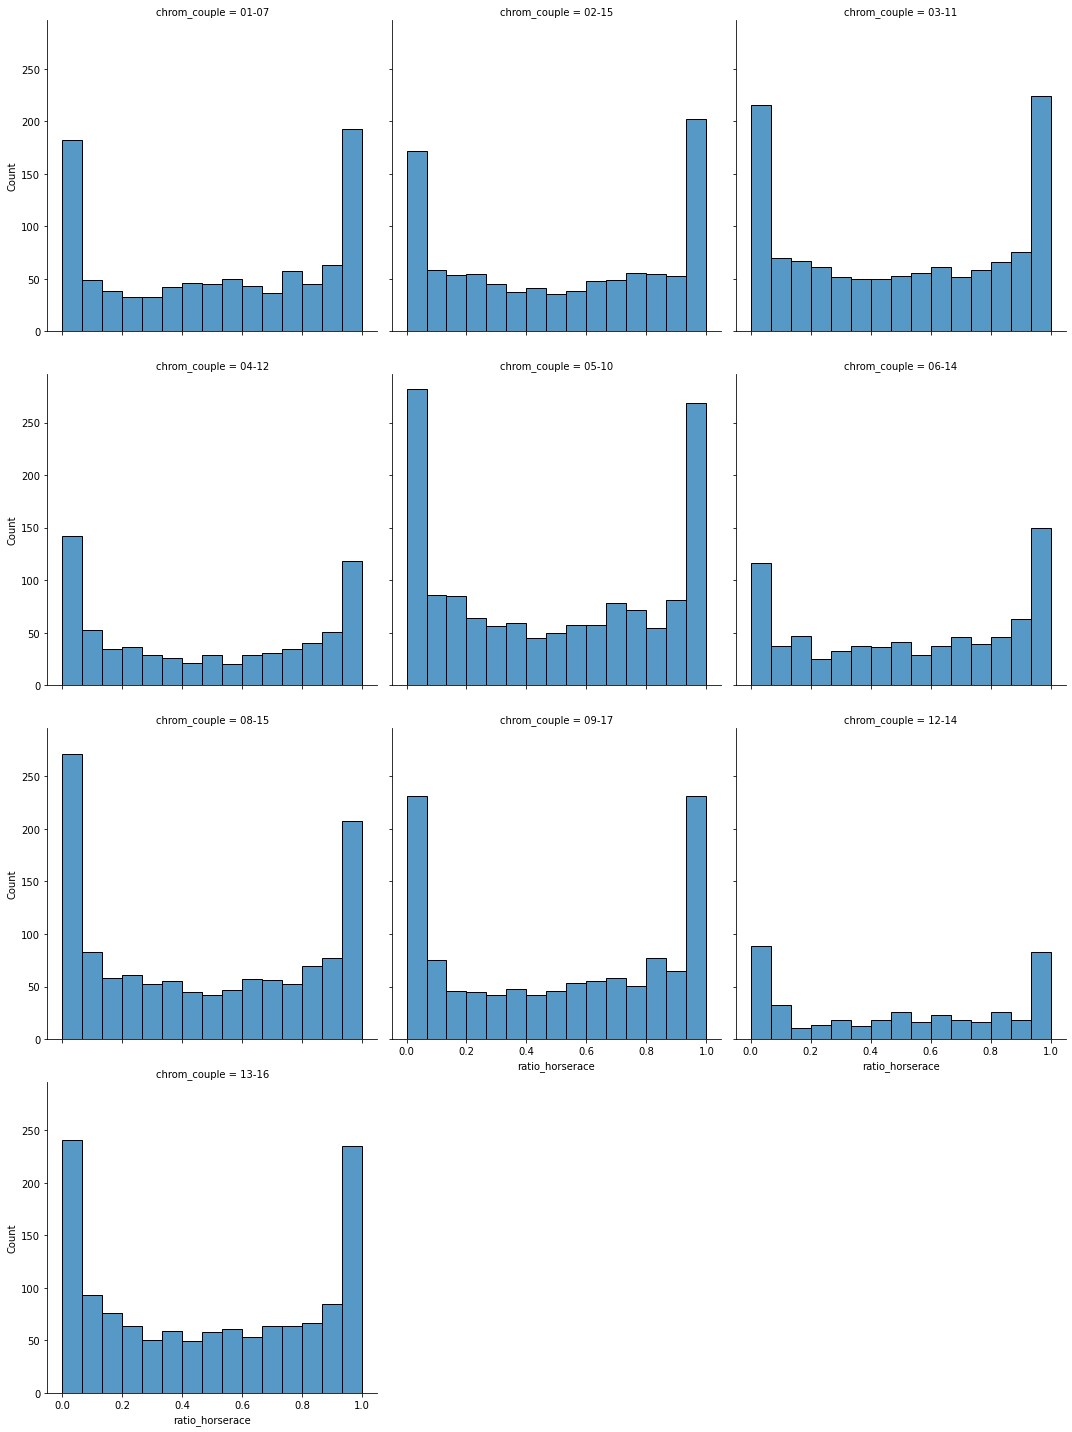

In [4]:

g = sns.displot(data=aggregatedBinomOnGenes,
                x="ratio_horserace",
                col="chrom_couple",
                col_wrap=3)
